In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
customer_churn=pd.read_csv('customer_churn.csv')

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
c_5=customer_churn.iloc[:,4] 
c_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [5]:
c_15=customer_churn.iloc[:,14] 
c_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [6]:
senior_male_electronic=customer_churn[(customer_churn['SeniorCitizen']==1) & (customer_churn['gender']=='Male') & (customer_churn['PaymentMethod']=='Electronic check')]

In [7]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [8]:
customer_total_tenure=customer_churn[(customer_churn['tenure']>70) | (customer_churn['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [9]:
two_mail_yes=customer_churn[(customer_churn['Contract']=="Two year") & (customer_churn['PaymentMethod']=="Mailed check") & (customer_churn['Churn']=="Yes") ]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [10]:
customer_333=customer_churn.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2586,1051-EQPZR,Female,0,Yes,Yes,44,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.60,780.25,No
6981,5568-DMXZS,Female,0,No,No,8,Yes,No,DSL,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,65.45,554.45,No
6368,2720-WGKHP,Male,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,181.7,Yes
989,3280-NMUVX,Male,0,Yes,Yes,34,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.60,678.8,No
4940,3703-KBKZP,Male,1,No,No,16,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.45,1261.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,1568-BEKZM,Male,1,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),90.05,6333.4,No
3844,3594-UVONA,Female,0,No,No,35,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),85.95,3110.1,Yes
1147,0411-EZJZE,Female,0,No,No,3,Yes,Yes,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,60.25,170.5,No
6461,0419-YAAPX,Male,0,Yes,No,49,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.30,4297.95,No


In [11]:
customer_churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
#data Visualization

Text(0.5, 1.0, 'Distribution of internet Service')

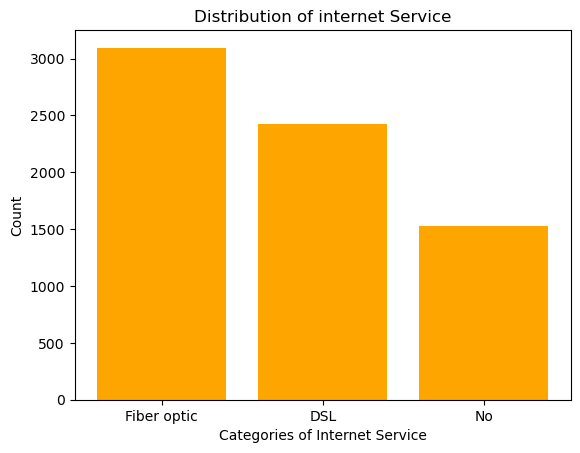

In [13]:

plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(),customer_churn['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count")
plt.title("Distribution of internet Service")

Text(0.5, 1.0, 'distribution of tenure')

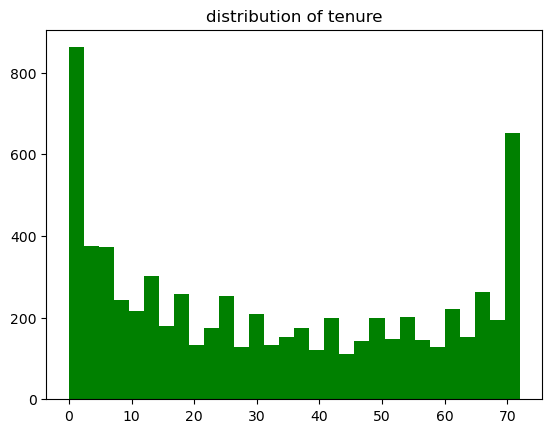

In [14]:
plt.hist(customer_churn["tenure"],bins=30,color="green")
plt.title("distribution of tenure")

Text(0.5, 1.0, 'Monthly charges vs Tenure')

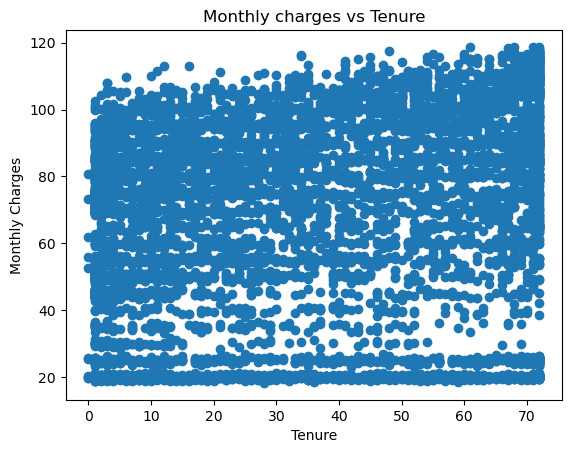

In [15]:
plt.scatter(x=customer_churn['tenure'],y=customer_churn['MonthlyCharges'])
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Monthly charges vs Tenure")

<Axes: title={'center': 'tenure'}, xlabel='[Contract]'>

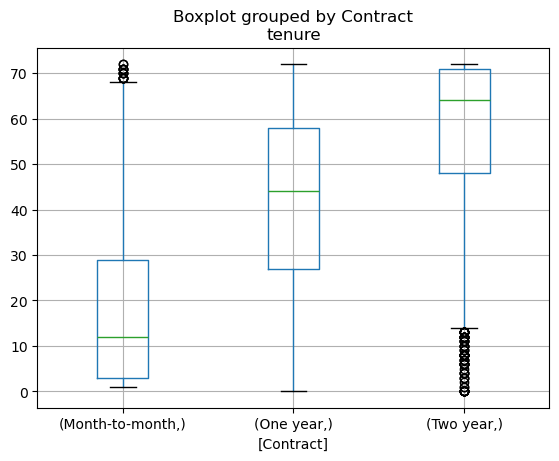

In [16]:
customer_churn.boxplot(column=["tenure"], by=['Contract'])

# mechine Learning

## linear Regression

In [17]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y=customer_churn[["MonthlyCharges"]]
x=customer_churn[["tenure"]]

In [18]:
y.head(),x.head()

(   MonthlyCharges
 0           29.85
 1           56.95
 2           53.85
 3           42.30
 4           70.70,
    tenure
 0       1
 1      34
 2       2
 3      45
 4       2)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
 

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4930, 1), (2113, 1), (4930, 1), (2113, 1))

In [21]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
#predicted on test set
y_pred=regressor.predict(x_test)
y_pred[:5],y_test[:5]

(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),
       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

In [23]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))


29.394584027273897

## Logistic regersion

In [24]:
x= customer_churn[['MonthlyCharges']]
y= customer_churn[['Churn']]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0)
 

In [26]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\Asura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
y_pred=log_model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

(array([[1815,    0],
        [ 651,    0]], dtype=int64),
 0.7360097323600974)

In [30]:
(1815)/(1815+651)

0.7360097323600974

In [31]:
## different ratio

In [32]:
x= customer_churn[['MonthlyCharges','tenure']]
y= customer_churn[['Churn']]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\Asura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
y_pred=log_model.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

(array([[934, 107],
        [212, 156]], dtype=int64),
 0.7735982966643009)

In [38]:
(934+156)/(934+156+212+107)

0.7735982966643009

## Decision Tree

In [63]:
x= customer_churn[['tenure']]
y= customer_churn[['Churn']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


In [43]:
from sklearn.tree import DecisionTreeClassifier
trees=DecisionTreeClassifier()
trees.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=trees.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [54]:
confusion_matrix(y_test,y_pred)

array([[828, 213],
       [216, 152]], dtype=int64)

In [55]:
(828+152)/(828+152+216+213)

0.6955287437899219

In [81]:
accuracy_score(y_test,y_pred)

0.7468054898248935

## Random Forest

In [70]:
x= customer_churn[['MonthlyCharges','tenure']]
y= customer_churn[['Churn']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [75]:
from  sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

C:\Users\Asura\AppData\Local\Temp\ipykernel_1100\988003462.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [76]:
y_pred=rf.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
confusion_matrix(y_test,y_pred)

array([[1346,  214],
       [ 321,  232]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred)

0.7468054898248935